In [4]:
pip install torch

   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.8/198.6 MB 24.8 MB/s eta 0:00:08
   ---------------------------------------- 1.5/198.6 MB 19.0 MB/s eta 0:00:11
   ---------------------------------------- 2.3/198.6 MB 18.6 MB/s eta 0:00:11
    --------------------------------------- 3.0/198.6 MB 17.6 MB/s eta 0:00:12
    --------------------------------------- 4.0/198.6 MB 18.0 MB/s eta 0:00:11
    --------------------------------------- 4.4/198.6 MB 17.4 MB/s eta 0:00:12
    --------------------------------------- 4.9/198.6 MB 15.7 MB/s eta 0:00:13
   - -------------------------------------- 5.3/198.6 MB 14.8 MB/s eta 0:00:14
   - -------------------------------------- 5.8/198.6 MB 14.7 MB/s eta 0:00:14
   - -------------------------------------- 5.9/198.6 MB 14.5 MB/s eta 0:00:14
   - -------------------------------------- 6.1/198.6 MB 12.7 MB/s eta 0:00:16
   - -------------------------------------- 7.0/198.6 MB 13.

In [5]:
pip install torchvision

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB 7.9 MB/s eta 0:00:01
   ------------------------ --------------- 0.7/1.2 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ----------- ---------------------------- 0.7/2.5 MB 22.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.4/2.5 MB 17.9 MB/s eta 0:00:01
   --------------------------------- ------ 2.2/2.5 MB 17.1 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 16.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   - -------------------------

In [12]:
pip install torch==2.2.1 torchvision==0.17.1 torchaudio==2.2.1 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 28.4 MB/s eta 0:01:27
     ---------------------------------------- 0.0/2.5 GB 21.9 MB/s eta 0:01:52
     ---------------------------------------- 0.0/2.5 GB 19.9 MB/s eta 0:02:04
     ---------------------------------------- 0.0/2.5 GB 19.5 MB/s eta 0:02:06
     ---------------------------------------- 0.0/2.5 GB 21.3 MB/s eta 0:01:55
     ---------------------------------------- 0.0/2.5 GB 21.6 MB/s eta 0:01:54
     ---------------------------------------- 0.0/2.5 GB 21.3 MB/s eta 0:01:55
     ---------------------------------------- 0.0/2.5 GB 21.3 MB/s eta 0:01:55
     ---------------------------------------- 0.0/2.5 GB 21.4 MB/s eta 0:01:55
     ---------------------------------------- 0.0/2.5 GB 21.6 MB/s eta 0:01:54
     ---------------------------------------- 0.0/2.5 GB 20.5 MB/s eta 0:02:00
 

  You can safely remove it manually.
  You can safely remove it manually.


In [10]:
pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.1 MB/s eta 0:00:11
    --------------------------------------- 0.2/11.6 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.3/11.6 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/11.6 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.6 MB 5.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.6 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.6 MB 6.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/11.6 MB 7.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.5/11.6 MB 7.9 MB/s eta 0:00:02
   -------------- ------------------------- 4.3/11.6 MB 9.1 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.6 MB 9.0 MB/s eta 0:00:01
   ----------

In [1]:
import torch

# GPU 사용 가능 확인
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU")


GPU is available. Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU


In [27]:
import os
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

# Custom Dataset 클래스 정의
class CustomImageDataset(Dataset):
    def __init__(self, directory, csv_file, transform=None):
        self.directory = directory
        self.transform = transform
        self.df = pd.read_csv(csv_file)
        self.df = self.df.dropna(subset=['Image name'])
        self.df = self.df[self.df['Usage'] == ('Training' if 'Train' in directory else 'PublicTest')]
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.directory, self.df.iloc[idx]['Image name'])
        image = Image.open(img_name)
        label = self.df.iloc[idx][2:12].values.argmax()
        if self.transform:
            image = self.transform(image)
        return image, label

# 이미지 전처리 정의
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 이미지를 그레이스케일로 변환
    transforms.Resize((48, 48)),  # 이미지 크기 조정  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5076,], std=[0.2120]),  # 1채널 이미지에 맞게 조정
])

# 데이터셋과 데이터로더 생성 (배치 크기 감소)
train_dataset = CustomImageDataset(directory='./data1/FER2013Train', csv_file='./fer2013new__.csv', transform=transform)
test_dataset = CustomImageDataset(directory='./data1/FER2013valid', csv_file='./fer2013new__.csv', transform=transform)

# 메모리 때문에 배치 줄임
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # 배치 크기 감소
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)  # 배치 크기 감소

# 모델 정의
class myVGG19(nn.Module):
    def __init__(self):
        super(myVGG19, self).__init__()
        self.vgg19 = models.vgg19(pretrained=False)
        self.vgg19.features[0] = nn.Conv2d(1, 64, kernel_size=3, padding=1)  # 첫 번째 레이어를 1채널 입력에 맞게 수정
        num_ftrs = self.vgg19.classifier[6].in_features
        self.vgg19.classifier[6] = nn.Linear(num_ftrs, 10)  # 마지막 레이어를 10개 클래스에 맞게 조정
    
    def forward(self, x):
        return self.vgg19(x)

model = myVGG19().to('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum = 0.5)

train_losses = []  # 초기화
train_accuracies = []  # 초기화
test_losses = []  # 초기화
test_accuracies = []  # 초기화

#훈련 함수
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for data, target in train_loader:
        data, target = data.to('cuda' if torch.cuda.is_available() else 'cpu'), target.to('cuda' if torch.cuda.is_available() else 'cpu')
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item() * data.size(0)  # 배치 크기를 고려
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
    train_loss /= total
    accuracy = 100. * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(accuracy)
    print(f'Epoch: {epoch}, Training Loss: {train_loss:.4f}, Accuracy: {accuracy:.2f}%')

# 테스트 함수
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to('cuda' if torch.cuda.is_available() else 'cpu'), target.to('cuda' if torch.cuda.is_available() else 'cpu')
            output = model(data)
            test_loss += criterion(output, target).item() * data.size(0)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)
    test_loss /= total
    accuracy = 100. * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)
    print(f"Test loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

for epoch in range(1, 11):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)


c:\Users\USER\Desktop\big6\3.11\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\USER\Desktop\big6\3.11\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 1, Training Loss: 1.3472, Accuracy: 51.82%
Test loss: 1.0331, Accuracy: 65.64%
Epoch: 2, Training Loss: 0.9196, Accuracy: 68.81%
Test loss: 0.8426, Accuracy: 71.57%
Epoch: 3, Training Loss: 0.7528, Accuracy: 74.51%
Test loss: 0.7499, Accuracy: 74.56%
Epoch: 4, Training Loss: 0.6267, Accuracy: 78.63%
Test loss: 0.7316, Accuracy: 75.33%
Epoch: 5, Training Loss: 0.5248, Accuracy: 82.21%
Test loss: 0.8255, Accuracy: 74.83%
Epoch: 6, Training Loss: 0.4362, Accuracy: 85.30%
Test loss: 0.7505, Accuracy: 76.47%
Epoch: 7, Training Loss: 0.3614, Accuracy: 87.94%
Test loss: 0.7613, Accuracy: 76.94%
Epoch: 8, Training Loss: 0.2997, Accuracy: 89.99%
Test loss: 0.8018, Accuracy: 75.85%
Epoch: 9, Training Loss: 0.2456, Accuracy: 91.91%
Test loss: 0.8799, Accuracy: 77.49%
Epoch: 10, Training Loss: 0.2033, Accuracy: 93.36%
Test loss: 0.9235, Accuracy: 76.45%


In [29]:
# 학습 시킨 모델 저장
torch.save(model, './vgg19_model.pt')

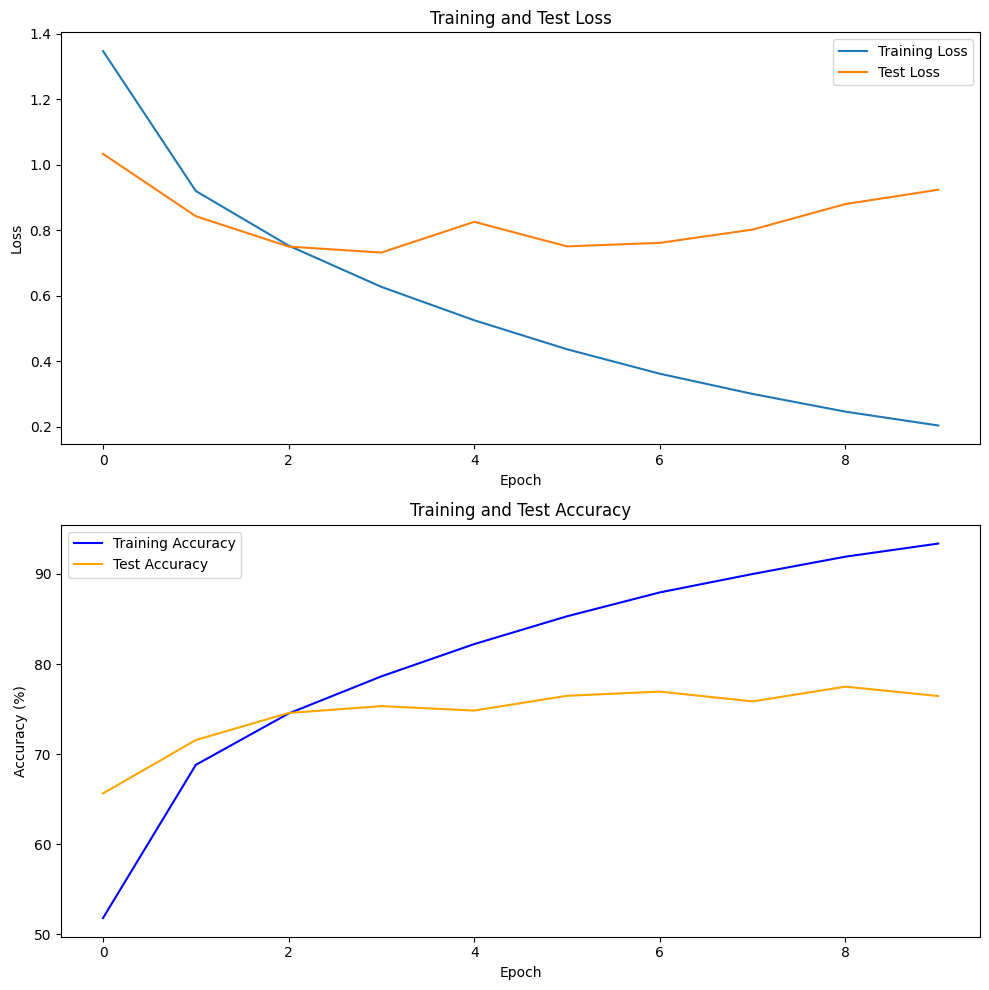

In [28]:
import matplotlib.pyplot as plt

# 손실 및 정확도 시각화
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(train_losses, label='Training Loss')
axs[0].plot(test_losses, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(train_accuracies, label='Training Accuracy', color='blue')
axs[1].plot(test_accuracies, label='Test Accuracy', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Training and Test Accuracy')

plt.tight_layout()
plt.show()


In [23]:
import os
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

# Custom Dataset 클래스 정의
class CustomImageDataset(Dataset):
    def __init__(self, directory, csv_file, transform=None):
        self.directory = directory
        self.transform = transform
        self.df = pd.read_csv(csv_file)
        self.df = self.df.dropna(subset=['Image name'])
        self.df = self.df[self.df['Usage'] == ('Training' if 'Train' in directory else 'PublicTest')]
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.directory, self.df.iloc[idx]['Image name'])
        image = Image.open(img_name)
        label = self.df.iloc[idx][2:12].values.argmax()
        if self.transform:
            image = self.transform(image)
        return image, label

# 이미지 전처리 정의
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 이미지를 그레이스케일로 변환
    transforms.Resize((48, 48)),  # 이미지 크기 조정  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5076,], std=[0.2120]),  # 1채널 이미지에 맞게 조정
])

# 데이터셋과 데이터로더 생성 (배치 크기 감소)
train_dataset = CustomImageDataset(directory='./data1/FER2013Train', csv_file='./fer2013new__.csv', transform=transform)
test_dataset = CustomImageDataset(directory='./data1/FER2013Valid', csv_file='./fer2013new__.csv', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # 배치 크기 감소
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)  # 배치 크기 감소

# 모델 정의
class myResNet(nn.Module):
    def __init__(self):
        super(myResNet, self).__init__()
        self.resnet = models.resnet50(pretrained=False)
        # 첫 번째 컨볼루션 레이어를 1채널 입력에 맞게 수정
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 10)
    
    def forward(self, x):
        return self.resnet(x)

model = myResNet().to('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_losses = []  # 초기화
train_accuracies = []  # 초기화
test_losses = []  # 초기화
test_accuracies = []  # 초기화

#훈련 함수
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for data, target in train_loader:
        data, target = data.to('cuda' if torch.cuda.is_available() else 'cpu'), target.to('cuda' if torch.cuda.is_available() else 'cpu')
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item() * data.size(0)  # 배치 크기를 고려
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
    train_loss /= total
    accuracy = 100. * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(accuracy)
    print(f'Epoch: {epoch}, Training Loss: {train_loss:.4f}, Accuracy: {accuracy:.2f}%')

# 테스트 함수
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to('cuda' if torch.cuda.is_available() else 'cpu'), target.to('cuda' if torch.cuda.is_available() else 'cpu')
            output = model(data)
            test_loss += criterion(output, target).item() * data.size(0)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)
    test_loss /= total
    accuracy = 100. * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)
    print(f"Test loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

for epoch in range(1, 11):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

c:\Users\USER\Desktop\big6\3.11\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\USER\Desktop\big6\3.11\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 1, Training Loss: 1.5729, Accuracy: 41.92%
Test loss: 1.4921, Accuracy: 47.52%
Epoch: 2, Training Loss: 1.1779, Accuracy: 59.41%
Test loss: 1.0379, Accuracy: 64.46%


KeyboardInterrupt: 

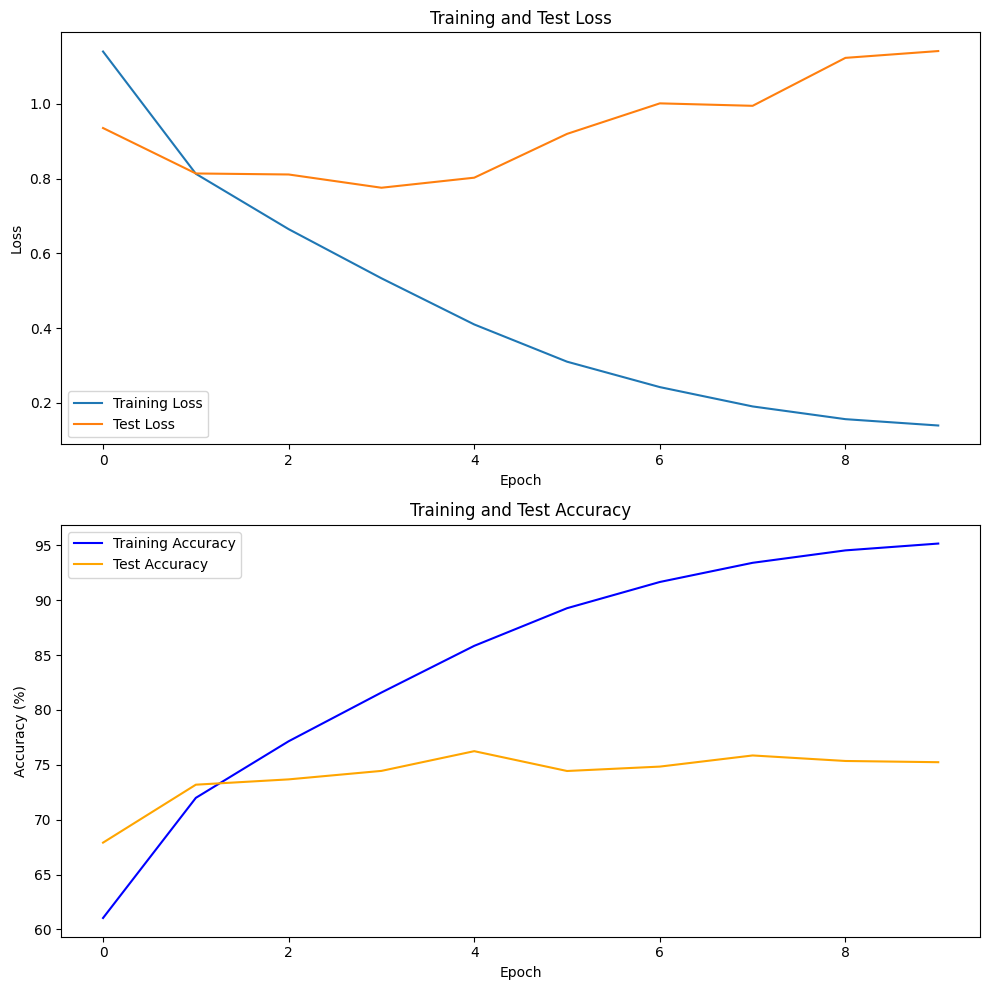

In [22]:
import matplotlib.pyplot as plt

# 손실 및 정확도 시각화
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(train_losses, label='Training Loss')
axs[0].plot(test_losses, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(train_accuracies, label='Training Accuracy', color='blue')
axs[1].plot(test_accuracies, label='Test Accuracy', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Training and Test Accuracy')

plt.tight_layout()
plt.show()
